/tmp/ipykernel_3473969/3125923184.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  counts = counts.pivot("Predicted", "True", "Count")
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/tmp/ipykernel_3473969/3125923184.py:72: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  counts = counts.pivot("Predicted", "True", "Count")
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

[159.32026717  33.20549918  67.76910162  45.53608072  12.8964085
  11.25604506   8.32637252   4.67594377   2.46234235   1.93023129]


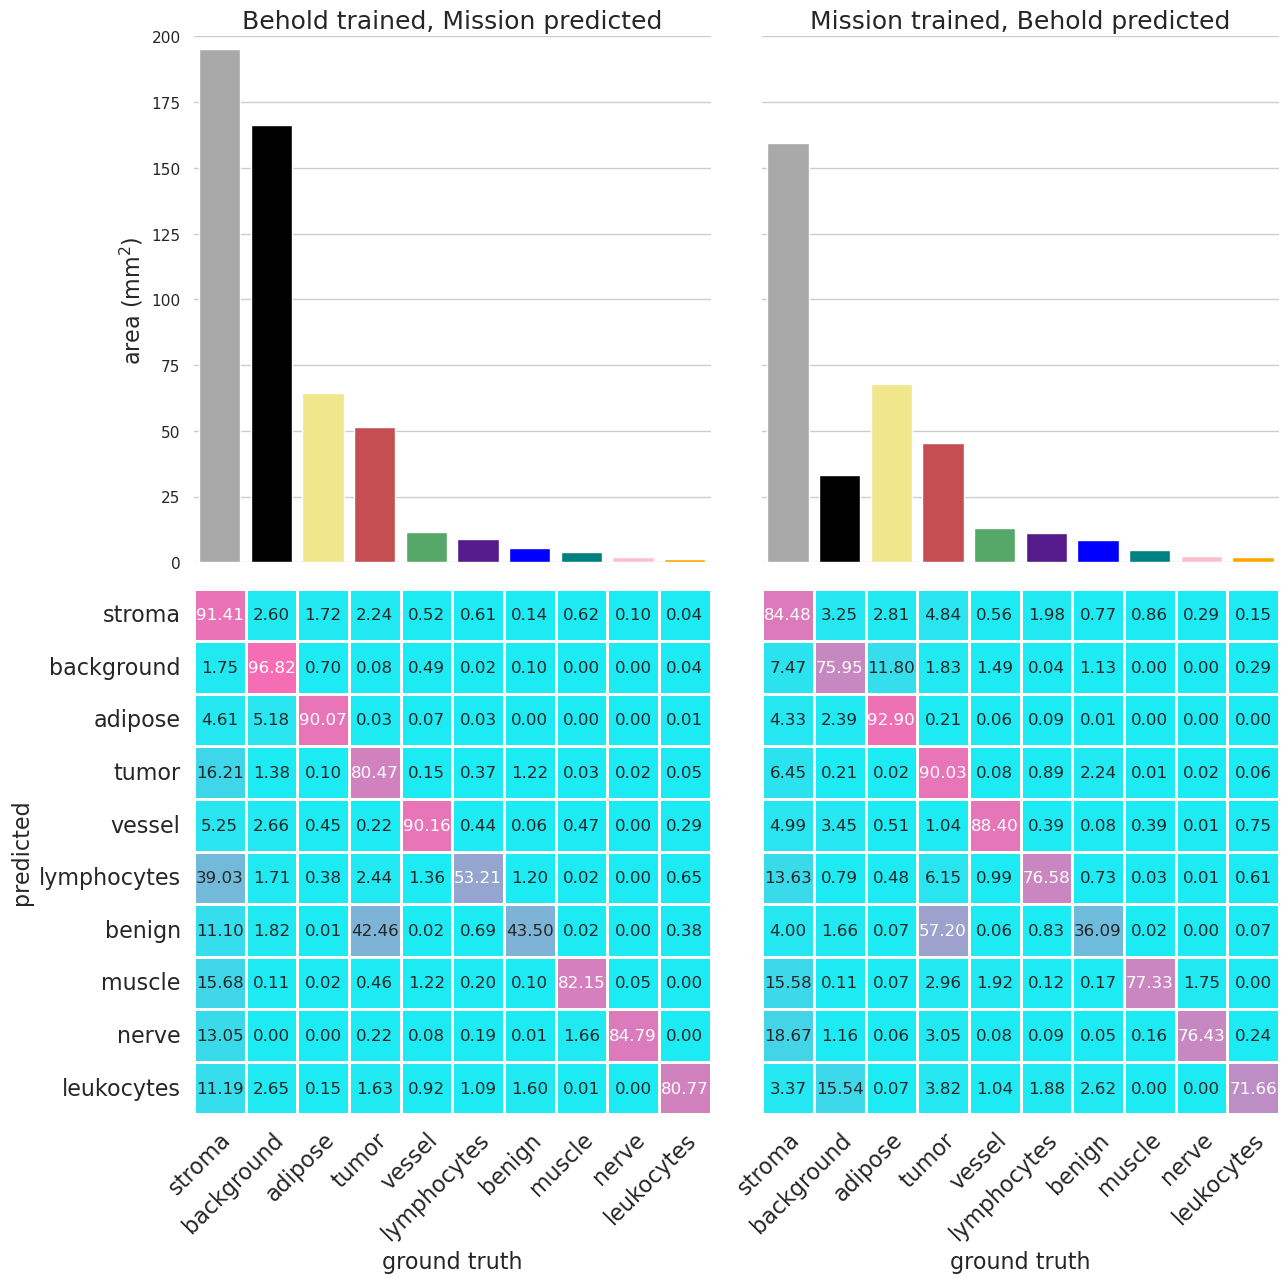

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

sns.set()
sns.set(style="whitegrid")
cats = ['stroma','background','adipose','tumor','vessel','lymphocytes','benign','muscle','nerve','leukocytes']


pal = ["darkgray", "black", "khaki", "r", "g", "#551a8b", "blue", "#008080", "pink", "orange"]

colors = [(29/256.0, 236/256.0, 244/256.0),(253/256.0, 105/256.0, 179/256.0)]
cmap_name = 'my_list'
newcmp = LinearSegmentedColormap.from_list(cmap_name, colors, N=64)

counts = pd.read_csv("confusion_matrix/confusion_matrix_MISSION.csv")
counts['True'] = pd.Categorical(counts['True'], categories=cats, ordered=True)
counts['Predicted'] = pd.Categorical(counts['Predicted'], categories=cats, ordered=True)


counts = counts.pivot("Predicted", "True", "Count")
#print(counts)


fig = plt.figure(figsize=(14,14))
gs = gridspec.GridSpec(nrows=2, 
                       ncols=2, 
                       figure=fig, 
                       width_ratios= [1, 1],
                       height_ratios=[1, 1],
                       wspace=0.1,
                       hspace=0.05)

ax = fig.add_subplot(gs[0:1, 0:1])
total = counts.sum(axis=0)
total_um = total.values * (0.5034 * 0.5034) # convert to um
total_mm = total_um * (0.001 * 0.001) # convert to mm
#print(total)
colors = sns.color_palette("viridis")
ax = sns.barplot(total.index, total_mm, palette=pal, saturation=1)
#ax.set(ylabel="area mm$^2$", xlabel="")
ax.set_xlabel("",fontsize=16)
ax.set_ylabel("area (mm$^2$)",fontsize=16)
sns.despine(left=True, bottom=True)
ax.margins(x=0.01)
ax.set(xticklabels=[])
#ax.set_title('Behold trained, Mission predicted', fontsize=18, fontweight="bold")
ax.set_title('Behold trained, Mission predicted', fontsize=18)
plt.ylim(0, 200)
plt.setp(ax.patches, linewidth=1, width=0.8)


ax2 = fig.add_subplot(gs[1:2, 0:1])
counts_norm_col=100*counts.div(counts.sum(axis=0), axis=1)
counts_norm_col=counts_norm_col.round(2)
counts_norm_row=100*counts.div(counts.sum(axis=1), axis=0)
counts_norm_row=counts_norm_row.round(2)
sns.heatmap(counts_norm_row, ax = ax2, fmt='.2f', cmap=newcmp, annot = True, cbar = False, linewidths=1, linecolor='white', cbar_ax=None, vmin=0, vmax=100)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, rotation_mode='anchor', ha="right",fontsize=16)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=16)
ax2.set_xlabel("ground truth",fontsize=16)
ax2.set_ylabel("predicted",fontsize=16)


counts = pd.read_csv("confusion_matrix/confusion_matrix_BEHOLD.csv")
counts['True'] = pd.Categorical(counts['True'], categories=cats, ordered=True)
counts['Predicted'] = pd.Categorical(counts['Predicted'], categories=cats, ordered=True)
counts = counts.pivot("Predicted", "True", "Count")

ax3 = fig.add_subplot(gs[0:1, 1:2])
total = counts.sum(axis=0)
total_um = total.values * (0.5034 * 0.5034) # convert to um
total_mm = total_um * (0.001 * 0.001) # convert to mm
print(total_mm)
colors = sns.color_palette("viridis")
ax3 = sns.barplot(total.index, total_mm, palette=pal, saturation=1)
ax3.set(ylabel="", xlabel="")
sns.despine(left=True, bottom=True)
ax3.margins(x=0.01)
ax3.set(xticklabels=[])
ax3.set(yticklabels=[])
ax3.set_title('Mission trained, Behold predicted', fontsize=18)
plt.ylim(0, 200)
plt.setp(ax.patches, linewidth=1, width=0.8)

ax4 = fig.add_subplot(gs[1:2, 1:2])
counts_norm_col=100*counts.div(counts.sum(axis=0), axis=1)
counts_norm_col=counts_norm_col.round(2)
counts_norm_row=100*counts.div(counts.sum(axis=1), axis=0)
counts_norm_row=counts_norm_row.round(2)
im = sns.heatmap(counts_norm_row, ax = ax4, fmt='.2f', cmap=newcmp, annot = True, cbar = False, linewidths=1, linecolor='white', cbar_ax=None, vmin=0, vmax=100)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 45, rotation_mode='anchor', ha="right",fontsize=16)
ax4.set(yticklabels=[])
ax4.set_ylabel("")
ax4.set_xlabel("ground truth",fontsize=16)

plt.show()
fig.savefig("confusion_matrix/confusion_matrix.pdf", bbox_inches='tight')
#plt.savefig("confusion_matrix.pdf", bbox_inches = 'tight')
